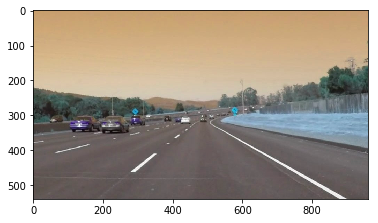

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = r"D:\users\new owner\Desktop\TKS\Article Lane Detection\udacity\solidWhiteCurve.jpg"
image1 = cv2.imread(image_path)
plt.imshow(image1)

In [2]:
def grey(image):
  #convert to grayscale
    image = np.asarray(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  #Apply Gaussian Blur --> Reduce noise and smoothen image
def gauss(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

  #outline the strongest gradients in the image --> this is where lines in the image are
def canny(image):
    edges = cv2.Canny(image,50,150)
    return edges


In [3]:
def region(image):
    height, width = image.shape
    #isolate the gradients that correspond to the lane lines
    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])
    #create a black image with the same dimensions as original image
    mask = np.zeros_like(image)
    #create a mask (triangle that isolates the region of interest in our image)
    mask = cv2.fillPoly(mask, triangle, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask

In [4]:
def display_lines(image, lines):
    lines_image = np.zeros_like(image)
    #make sure array isn't empty
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line
            #draw lines on a black image
            cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return lines_image


In [5]:
def average(image, lines):
    left = []
    right = []
    for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        #fit line to points, return slope and y-int
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        print(parameters)
        slope = parameters[0]
        y_int = parameters[1]
        #lines on the right have positive slope, and lines on the left have neg slope
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))
    #takes average among all the columns (column0: slope, column1: y_int)
    right_avg = np.average(right, axis=0)
    left_avg = np.average(left, axis=0)
    #create lines based on averages calculates
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)
    return np.array([left_line, right_line])
    

In [6]:
def make_points(image, average):
    print(average)
    slope, y_int = average
    y1 = image.shape[0]
    #how long we want our lines to be --> 3/5 the size of the image
    y2 = int(y1 * (3/5))
    #determine algebraically
    x1 = int((y1 - y_int) // slope)
    x2 = int((y2 - y_int) // slope)
    return np.array([x1, y1, x2, y2])

In [ ]:
'''##### DETECTING lane lines in image ######'''

copy = np.copy(image1)
edges = cv2.Canny(copy,50,150)
isolated = region(edges)
cv2.imshow("edges", edges)
cv2.imshow("iso", isolated)
cv2.waitKey(0)


#DRAWING LINES: (order of params) --> region of interest, bin size (P, theta), min intersections needed, placeholder array, 
lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
averaged_lines = average(copy, lines)
black_lines = display_lines(copy, averaged_lines)
#taking wighted sum of original image and lane lines image
lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)
cv2.imshow("lanes", lanes)
cv2.waitKey(0)



In [ ]:
'''##### DETECTING lane lines in video ######'''

video = r"D:\users\new owner\Desktop\TKS\Article Lane Detection\test2_v2_Trim.mp4"
cap = cv2.VideoCapture(video)
print("here")
num = 0
while(cap.isOpened()): 
    ret, frame = cap.read()
    print(num)
    num += 1
    if ret == True:
        gaus = gauss(frame)
        edges = cv2.Canny(gaus,50,150)
        isolated = region(edges)
        #region of interest, bin size (P, theta), min intersections needed, placeholder array, 
        lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 50, np.array([]), minLineLength=40, maxLineGap=5)
        averaged_lines = average(frame, lines)
        black_lines = display_lines(frame, averaged_lines)
        #taking wighted sum of original image and lane lines image
        lanes = cv2.addWeighted(frame, 0.8, black_lines, 1, 1)
        cv2.imshow("frame", lanes)
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break
    else:
        break
cap.release() 
cv2.destroyAllWindows()  

In [ ]:
'''##### DETECTING EDGES ON FACE ######'''

video = r"D:\users\new owner\Desktop\TKS\Article Lane Detection\test2.mp4"
cap = cv2.VideoCapture(0)
print("here")
while(cap.isOpened()): 
    ret, frame = cap.read()
    if ret == True:
        grey = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        gaus = gauss(grey)
        edges = cv2.Canny(gaus,50,150)
        cv2.imshow("frame", edges)
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break
    else:
        break
cap.release() 
cv2.destroyAllWindows() 